<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/%5BSSH%5DAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 – Polynomial Regression using ``torch.nn.Module``

- Please create a copy of this notebook onto your own Drive before working on it: `File-->Save a copy in Drive`
- Please submit your ipynb file named with your initials, e.g. `YGM-Assignment1.ipynb` with **the CODE cells output visible** to support your answers and **TEXTUAL answers given as comments** in the code cells.
- Deadline for submission is **midnight, Friday, March 18th.**

## Neural Network Model for Polynomial Regression
Your task is to build a neural network for the function $y = x^2 + 3x$

Requirements:
- You MUST use `torch.nn.Module` to define your neural network class.
- The training data should have **10 input values, $x$, and the correct corresponding output values, $y$,** for the function $y = x^2 + 3x$
- The NN may have **maximum TWO hidden layers**.
- You may use a **maximum of 500 neuron units in each hidden layer**.
- You may train over a **maximum of 1000 epochs**.
- Use suitable activation functions that have been covered in class.
- You MUST use the **Adam optimiser, `torch.optim.Adam()`** and the **MSE loss function**.
- **IMPORTANT:** Your model must have a **LOSS OF LESS THAN 0.01** at the end of training.
- **Train your model at least 3 times** to see that the final loss value is stable across all three runs.
- Print the loss at every 25th iteration.
- Test the model on $x=10$.
- **Save your training loss** at every iteration.

Note:
- If your model does not achieve a loss of less than 0.01, you will still be awarded marks for `Q7 – Q10` as long as you can explain your answers accordingly.

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 1. Define training data for a the mathematical formula y = x^2 + 3x (3)

x = torch.tensor([
                  [0], [1], [2], [3], [4], [5], [6], [7], [8], [9]
], dtype = torch.float32)

y = torch.tensor([
                  [0], [1**2 + 3*1], [2**2 + 3*2], [3**2 + 3*3], [4**2 + 3*4], [5**2 + 3*5], [6**2 + 3*6], [7**2 + 3*7], [8**2 + 3*8], [9**2 + 3*9]
], dtype = torch.float32)

print(x, '\n', y)
print(x.shape, y.shape)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]]) 
 tensor([[  0.],
        [  4.],
        [ 10.],
        [ 18.],
        [ 28.],
        [ 40.],
        [ 54.],
        [ 70.],
        [ 88.],
        [108.]])
torch.Size([10, 1]) torch.Size([10, 1])


In [ ]:
# 2. Define NN class (10)

class MyNN(nn.Module) :

  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(1, 300)
    self.activation1 = nn.ReLU()
    self.linear2 = nn.Linear(300, 300)
    self.activation2 = nn.ReLU()
    self.linear3 = nn.Linear(300,1)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation1(x)
    x = self.linear2(x)
    x = self.activation2(x)
    x = self.linear3(x)
    return x

In [ ]:
# 3. Create an instance of NN model (2)
model = MyNN() 

In [ ]:
# 4. Loss and Optimiser (2)

learning_rate = 0.01
loss_fn = nn.MSELoss() 
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:

# 5. Training loop
# 5.1 Forward pass (2)
# 5.2 Backward pass (3)
# 5.3 Print loss every 25th epoch (1)
# 5.4 Save training loss at every epoch (2)
  
# Ensure that loss is less than 0.01 at the end if training consistently (3)

training_loss=[]

for epoch in range(1000):
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 
  training_loss.append(loss.item())

  opt.zero_grad()  
  loss.backward()
  opt.step() 

  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/1000, Loss={loss.item():.4f} ')



Epoch 25/1000, Loss=132.4842 
Epoch 50/1000, Loss=18.4808 
Epoch 75/1000, Loss=4.6117 
Epoch 100/1000, Loss=0.9534 
Epoch 125/1000, Loss=0.3130 
Epoch 150/1000, Loss=0.1087 
Epoch 175/1000, Loss=0.0487 
Epoch 200/1000, Loss=0.0468 
Epoch 225/1000, Loss=0.0172 
Epoch 250/1000, Loss=0.0328 
Epoch 275/1000, Loss=0.0155 
Epoch 300/1000, Loss=0.0042 
Epoch 325/1000, Loss=0.0021 
Epoch 350/1000, Loss=0.0132 
Epoch 375/1000, Loss=0.0187 
Epoch 400/1000, Loss=0.0152 
Epoch 425/1000, Loss=0.0027 
Epoch 450/1000, Loss=0.0022 
Epoch 475/1000, Loss=0.0156 
Epoch 500/1000, Loss=0.0142 
Epoch 525/1000, Loss=0.0786 
Epoch 550/1000, Loss=0.0192 
Epoch 575/1000, Loss=0.0391 
Epoch 600/1000, Loss=0.0225 
Epoch 625/1000, Loss=0.0117 
Epoch 650/1000, Loss=0.0057 
Epoch 675/1000, Loss=0.0024 
Epoch 700/1000, Loss=0.0010 
Epoch 725/1000, Loss=0.0004 
Epoch 750/1000, Loss=0.0002 
Epoch 775/1000, Loss=0.0001 
Epoch 800/1000, Loss=0.0013 
Epoch 825/1000, Loss=0.0604 
Epoch 850/1000, Loss=0.0076 
Epoch 875/1000

In [ ]:
training_loss[:4]

[2971.97412109375, 1495.0894775390625, 314.3625183105469, 321.93585205078125]

Text(0, 0.5, 'MSE Loss')

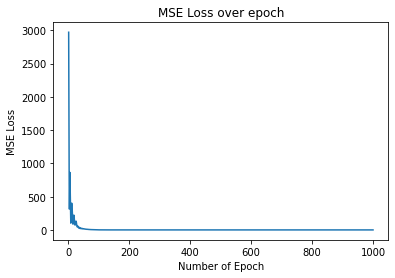

In [ ]:
# 6. Visualize (3)
# Plot the landscape of your training loss (MSE loss) saved for every epoch.
# y-axis would mean MSE loss and x-axis would mean the epoch of your training.
# Hint: you should plot (1,first MSE loss), ... ,(last epoch number,last MSE loss)

import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(1,1000,1000)
plt.title('MSE Loss over epoch')
plt.plot(x_range.tolist(), training_loss)
plt.xlabel('Number of Epoch')
plt.ylabel('MSE Loss')


In [ ]:
# 7. Prediction (2)
# Let's use the model on a new number x, defined as a tensor

# Get the model's prediction for this new x

test = torch.tensor([10], dtype = torch.float32)
print(model(test).item())
print(10**2 + 10*3)

127.96083068847656
130


In [ ]:
# Make sure the output of your code cells support your answers below:

# Q8. Describe how the loss changed over time during training. (2)
# A8. MSE Loss decreses over time as the number of epoch increases.

# Q9. Is the prediction for x=10 close enough to the ideal value of 130? 
# Why do you think the prediction is or isn't close enough to the ideal value? (2)
# A09. The predicted value is not quite close to the actual value. I think the trained model is over-fitted. 



In [ ]:
# Q10. What are the predictions for x=20 and x=100? Based on these predictions, 
# comment on whether the model has captured the relationship between the training inputs and outputs. (2)

test = torch.tensor([20], dtype = torch.float32)
print(model(test).item())
print(20**2 + 20*3)
print('\n')

test = torch.tensor([100], dtype = torch.float32)
print(model(test).item())
print(100**2 + 100*3)

# A10. The model seems over-fitted since it does not capture out-of-sample relationship,
# because if I test with bigger number, the loss gets bigger.

322.8564758300781
460


1770.12158203125
10300


In [ ]:
# Q11. Apart from tweaking the number of epochs and the number of neuron units in the hidden layer, think
# of AT LEAST ONE more thing you would do to try to improve the model. You do NOT have to follow the 
# requirements nor to implement anything. (1)

# A.11. I think providing wide range of inputs would increase the test accuracy.
# The original training data were so dense ranging from 0 to 9.
# Also, decreasing the number of epoch would be another way of improving the model.
